# Workflow de Classificação: Diagnóstico de Câncer de Mama

**Aluno:** [Seu Nome]
**Projeto:** Tech Challenge - Fase 1
**Objetivo:** Desenvolver um modelo de classificação para prever se um diagnóstico é Maligno ou Benigno.

## Etapa 1: Configuração do Ambiente e Análise Estrutural

### Tarefa 1.1: Importar as bibliotecas necessárias

In [1]:
%pip install --quiet pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


Note: you may need to restart the kernel to use updated packages.


### Tarefa 1.2: Carregar o conjunto de dados

In [3]:
dt = pd.read_csv('data/breast_cancer.csv')
dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Tarefa 1.3: Realizar a inspeção estrutural inicial dos dados (`.shape`, `.info()`, `.head()`, `.describe()`)

In [5]:
print("=== Informações do DataFrame ===")
print(dt.info())
print("\n=== Estatísticas Descritivas ===")
print(dt.describe())
print("\n=== ")
print(dt.shape)
print("\n=== Colunas do DataFrame ===")
print(dt.columns.tolist())
      

=== Informações do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float6

### Tarefa 1.4: Realizar a limpeza preliminar (remover colunas `id` e `Unnamed: 32`)

In [7]:
dt = dt.drop(columns=['Unnamed: 32', 'id'])
dt.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Etapa 2: Análise Exploratória de Dados (EDA)

### Tarefa 2.1 (Análise Univariada): Analisar a distribuição da variável alvo `diagnosis`

**Análise Numérica**
O método .value_counts() é a ferramenta essencial para contar as ocorrências de cada categoria.

In [16]:
counts = dt['diagnosis'].value_counts()
percentages = dt['diagnosis'].value_counts(normalize=True)*100

distribution_df = pd.DataFrame({
    'Contagem': counts,
    'Porcentagem': percentages.map('{:.2f}%'.format) # Formata a coluna de porcentagem
})
print("Distribuição das Classes:")
print(distribution_df)

Distribuição das Classes:
           Contagem Porcentagem
diagnosis                      
B               357      62.74%
M               212      37.26%


 **Análise Visual**
 Um gráfico de contagem (countplot) é a melhor forma de visualizar a distribuição.

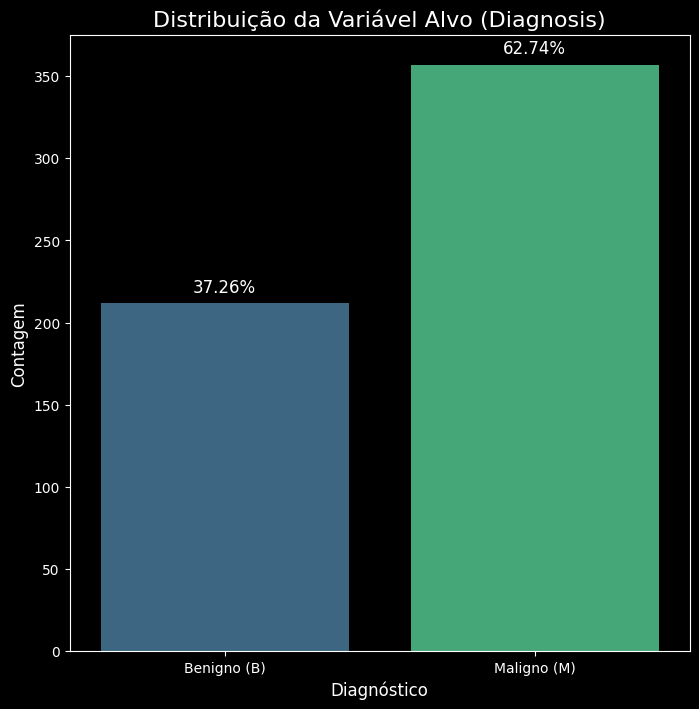

In [22]:

plt.figure(figsize=(8, 8))

total = len(dt)
ax = sns.countplot(x='diagnosis', data=dt, palette='viridis', hue='diagnosis')
for p in ax.patches:
    count = p.get_height()
    # Calcula a porcentagem
    percentage = f'{100 * count / total:.2f}%'
    x = p.get_x() + p.get_width() / 2  # Centro da barra
    y = p.get_height()                 # Topo da barra
    
    # Adiciona o texto usando ax.annotate para mais controle
    ax.annotate(
        text=percentage,
        xy=(x, y),
        xytext=(0, 5), # Deslocamento vertical de 5 pontos
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Adicionando títulos e rótulos para clareza (seu código original)
plt.title('Distribuição da Variável Alvo (Diagnosis)', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Benigno (B)', 'Maligno (M)'])

plt.show()

### Tarefa 2.2 (Análise Univariada): Analisar a distribuição das features numéricas com histogramas

### Tarefa 2.3 (Análise Bivariada): Analisar a relação entre as features e a variável alvo com boxplots

### Tarefa 2.4 (Análise Bivariada): Analisar a correlação entre as features numéricas com um heatmap

### Tarefa 2.5 (Análise Multivariada): Analisar a separabilidade das classes com PCA

## Etapa 3: Pré-Processamento e Engenharia de Features

### Tarefa 3.1: Separar as features (X) e a variável alvo (y)

### Tarefa 3.2: Codificar a variável alvo (`diagnosis`) para formato numérico

### Tarefa 3.3: Dividir os dados em conjuntos de treino e teste (usando `stratify`)

### Tarefa 3.4: Escalonar as features numéricas (usando `StandardScaler`)

## Etapa 4: Modelagem e Treinamento

### Tarefa 4.1: Instanciar o modelo de baseline (Regressão Logística)

### Tarefa 4.2: Treinar o modelo com os dados de treino escalonados

## Etapa 5: Avaliação do Modelo e Análise de Resultados

### Tarefa 5.1: Realizar previsões com o conjunto de teste

### Tarefa 5.2: Calcular e analisar as métricas de classificação (Acurácia, Precisão, Recall, F1-Score, AUC)

### Tarefa 5.3: Gerar e visualizar a Matriz de Confusão

## Etapa 6: (Bônus) Experimento com Redução de Dimensionalidade (PCA)

### Tarefa 6.1: Aplicar PCA aos dados de treino e teste escalonados

### Tarefa 6.2: Treinar um novo modelo de Regressão Logística com os dados transformados pelo PCA

### Tarefa 6.3: Avaliar o modelo treinado com PCA (métricas e matriz de confusão)

### Tarefa 6.4: Comparar o desempenho do modelo com features completas vs. modelo com PCA

## Etapa 7: Conclusão e Próximos Passos

### Tarefa 7.1: Sumarizar os resultados e justificar a escolha do modelo final com base nas métricas (foco em Recall)

### Tarefa 7.2: Propor e documentar próximos passos para melhoria do modelo